In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
pd.set_option('display.max_rows' , None)
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_colWidth' , None)

In [3]:
df = pd.read_csv('Gurgaon_Properties_Outlier_cleaned_data.csv')

In [4]:
df.columns

Index(['Property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score', 'arearoom_ratio'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3555 entries, 0 to 3554
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Property_type        3555 non-null   object 
 1   society              3554 non-null   object 
 2   sector               3555 non-null   object 
 3   price                3555 non-null   float64
 4   price_per_sqft       3555 non-null   float64
 5   area                 3555 non-null   float64
 6   areaWithType         3555 non-null   object 
 7   bedRoom              3555 non-null   int64  
 8   bathroom             3555 non-null   int64  
 9   balcony              3555 non-null   object 
 10  floorNum             3538 non-null   float64
 11  facing               2545 non-null   object 
 12  agePossession        3555 non-null   object 
 13  super_built_up_area  1875 non-null   float64
 14  built_up_area        1587 non-null   float64
 15  carpet_area          1840 non-null   f

In [6]:
df.head(2)

,Property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,arearoom_ratio
0,house,independent,sector 12,2.90,10741.0,2700.0,Plot area 2700(250.84 sq.m.),7,7,3,2.0,South-West,Old Property,NaN,2700.0,NaN,0,0,0,0,0,1,7,385.714286
1,flat,umang winter hills,sector 77,0.86,6408.0,1342.0,Super Built up area 1342(124.68 sq.m.),2,2,2,16.0,NaN,New Property,1342.0,NaN,NaN,0,0,0,0,0,2,79,671.000000


In [7]:
df.shape

(3555, 24)

In [8]:
df.duplicated().sum()

np.int64(1)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.isnull().sum()

,0
Property_type,0
society,1
sector,0
price,0
price_per_sqft,0
area,0
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


# **Built up area**

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

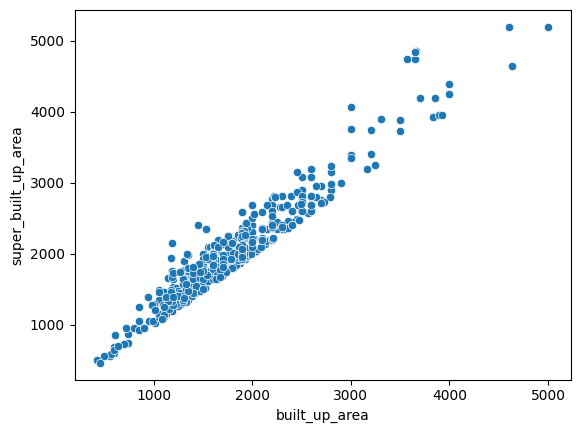

In [11]:
sns.scatterplot(x = df['built_up_area'] , y = df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

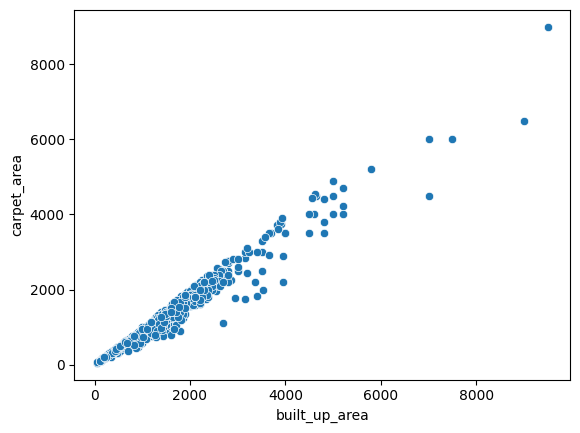

In [12]:
sns.scatterplot(x = df['built_up_area'] , y = df['carpet_area'])

- There is very strong linear corelationship of builtup area with super built up are and carpet area

In [ ]:
(df['built_up_area'].isnull())&(df['super_built_up_area'].isnull())&(df['carpet_area'].isnull())

In [14]:
all_present_df = df[~((df['built_up_area'].isnull())|(df['super_built_up_area'].isnull())|(df['carpet_area'].isnull()))]

In [15]:
all_present_df.head()

,Property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,arearoom_ratio
2,flat,ambience creacions,sector 22,2.55,13710.0,1860.0,Super Built up area 1860(172.8 sq.m.)Built Up area: 1600 sq.ft. (148.64 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),3,3,3,8.0,North-East,Relatively New,1860.0,1600.0,1400.0,0,0,0,0,1,0,125,620.000000
6,flat,tata primanti,sector 72,4.00,13769.0,2905.0,Super Built up area 2905(269.88 sq.m.)Built Up area: 2800 sq.ft. (260.13 sq.m.)Carpet area: 2500 sq.ft. (232.26 sq.m.),4,5,3+,9.0,North-East,Relatively New,2905.0,2800.0,2500.0,0,1,0,0,0,2,165,726.250000
9,flat,ireo skyon,sector 60,2.05,15185.0,1350.0,Super Built up area 1524(141.58 sq.m.)Built Up area: 1520 sq.ft. (141.21 sq.m.)Carpet area: 1350 sq.ft. (125.42 sq.m.),2,3,2,2.0,North-East,Relatively New,1524.0,1520.0,1350.0,0,0,1,0,0,2,174,675.000000
23,flat,emaar palm gardens,sector 83,1.55,9012.0,1720.0,Super Built up area 1720(159.79 sq.m.)Built Up area: 1400 sq.ft. (130.06 sq.m.)Carpet area: 1095 sq.ft. (101.73 sq.m.),3,3,3,4.0,West,Relatively New,1720.0,1400.0,1095.0,0,1,0,0,0,2,174,573.333333
28,flat,dlf new town heights,sector 90,1.54,6514.0,2364.0,Super Built up area 2364(219.62 sq.m.)Built Up area: 2200 sq.ft. (204.39 sq.m.)Carpet area: 1850 sq.ft. (171.87 sq.m.),4,4,3+,12.0,South-West,Moderately Old,2364.0,2200.0,1850.0,0,1,0,1,0,2,111,591.000000


In [16]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [17]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [18]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [19]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [20]:
sbc_df.head()

,Property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,arearoom_ratio
19,flat,pivotal devaan,sector 84,0.37,6346.0,583.0,Super Built up area 583(54.16 sq.m.)Carpet area: 483 sq.ft. (44.87 sq.m.),2,2,1,5.0,North-West,Relatively New,583.0,NaN,483.0,0,0,0,0,0,1,73,291.500000
21,flat,dlf the ultima,sector 81,2.21,10366.0,2132.0,Super Built up area 2132(198.07 sq.m.)Carpet area: 1650 sq.ft. (153.29 sq.m.),3,3,3+,3.0,South,Relatively New,2132.0,NaN,1650.0,0,1,0,0,0,0,149,710.666667
26,flat,shree vardhman victoria,sector 70,1.65,8462.0,1950.0,Super Built up area 1950(181.16 sq.m.)Carpet area: 1161 sq.ft. (107.86 sq.m.),3,5,3,6.0,North-East,Relatively New,1950.0,NaN,1161.0,0,1,0,1,0,1,167,650.000000
37,flat,shree vardhman victoria,sector 70,1.10,8462.0,1300.0,Super Built up area 1300(120.77 sq.m.)Carpet area: 788 sq.ft. (73.21 sq.m.),2,2,2,0.0,West,New Property,1300.0,NaN,788.0,1,0,0,0,0,1,49,650.000000
53,flat,pivotal devaan,sector 84,0.36,7595.0,474.0,Super Built up area 583(54.16 sq.m.)Carpet area: 481 sq.ft. (44.69 sq.m.),2,2,1,9.0,West,Relatively New,583.0,NaN,481.0,0,0,1,0,0,0,80,237.000000


In [21]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

/tmp/ipython-input-21-1215074969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
/tmp/ipython-input-21-1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['supe

In [22]:
df.update(sbc_df)

In [23]:
df.isnull().sum()

,0
Property_type,0
society,1
sector,0
price,0
price_per_sqft,0
area,0
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


In [24]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [25]:
sb_df.head()

,Property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,arearoom_ratio
1,flat,umang winter hills,sector 77,0.86,6408.0,1342.0,Super Built up area 1342(124.68 sq.m.),2,2,2,16.0,NaN,New Property,1342.0,NaN,NaN,0,0,0,0,0,2,79,671.000000
4,flat,godrej summit,sector 104,0.98,5950.0,1647.0,Super Built up area 1647(153.01 sq.m.),3,3,3,12.0,East,Relatively New,1647.0,NaN,NaN,0,0,0,0,1,1,79,549.000000
8,flat,m3m the marina,sector 68,1.45,9615.0,1508.0,Super Built up area 1508(140.1 sq.m.),3,2,3+,9.0,NaN,New Property,1508.0,NaN,NaN,0,0,0,0,0,1,0,502.666667
11,flat,dlf new town heights,sector 90,1.75,5721.0,3059.0,Super Built up area 2727(253.35 sq.m.),4,4,3+,17.0,South,Relatively New,2727.0,NaN,NaN,0,1,0,1,0,1,88,764.750000
14,flat,m3m golfestate,sector 65,5.20,17456.0,2979.0,Super Built up area 2979(276.76 sq.m.),3,3,3,18.0,North,Relatively New,2979.0,NaN,NaN,1,1,0,0,0,2,76,993.000000


In [26]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

/tmp/ipython-input-26-1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
/tmp/ipython-input-26-1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)


In [27]:
df.update(sb_df)

In [28]:
df.isnull().sum()

,0
Property_type,0
society,1
sector,0
price,0
price_per_sqft,0
area,0
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


In [29]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [30]:
c_df.head()

,Property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,arearoom_ratio
5,flat,signature the roselia,sector 95,0.45,7909.0,569.0,Carpet area: 569 (52.86 sq.m.),2,2,2,2.0,East,New Property,NaN,NaN,569.0,0,0,0,0,0,2,31,284.5
10,house,independent,sector 11,1.80,8079.0,2228.0,Carpet area: 2228 (206.99 sq.m.),8,5,2,1.0,South,Undefined,NaN,NaN,2228.0,0,0,0,0,0,1,0,278.5
13,flat,signature global park 4,sector 36,0.85,11333.0,750.0,Carpet area: 750 (69.68 sq.m.),3,2,3,1.0,NaN,New Property,NaN,NaN,750.0,0,0,0,0,0,1,33,250.0
15,flat,emaar digihomes,sector 62,2.15,14257.0,1508.0,Carpet area: 1508 (140.1 sq.m.),2,2,3,31.0,NaN,Under Construction,NaN,NaN,1508.0,0,0,0,0,0,1,101,754.0
17,flat,hcbs sports ville,sohna road,0.32,6166.0,519.0,Carpet area: 519 (48.22 sq.m.),2,2,2,2.0,NaN,New Property,NaN,NaN,519.0,0,0,0,0,0,1,37,259.5


In [31]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

/tmp/ipython-input-31-2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
/tmp/ipython-input-31-2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [32]:
df.update(c_df)

In [33]:
df.isnull().sum()

,0
Property_type,0
society,1
sector,0
price,0
price_per_sqft,0
area,0
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


(0.0, 12000.0)

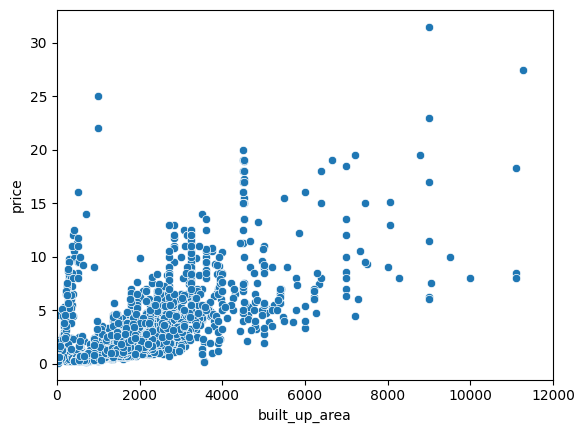

In [38]:
sns.scatterplot(x = df['built_up_area'],y = df['price'])
plt.xlim(0,12000)

In [39]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [40]:
anamoly_df.sample(5)

,price,area,built_up_area
2731,2.79,1969.0,1654.0
491,3.95,2343.0,1900.0
597,8.00,2700.0,300.0
2,2.55,1860.0,1600.0
294,4.50,1350.0,1350.0


In [41]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [42]:
df.update(anamoly_df)

(0.0, 12000.0)

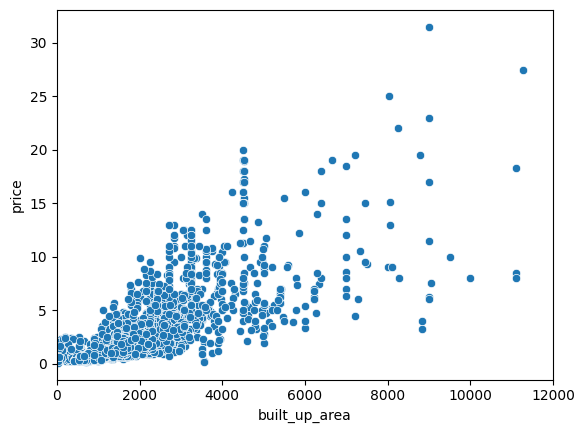

In [43]:
sns.scatterplot(x = df['built_up_area'],y = df['price'])
plt.xlim(0,12000)

In [45]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','arearoom_ratio'],inplace=True)

In [46]:
df.head()

,Property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 12,2.90,10741.0,7,7,3,2.0,South-West,Old Property,2700.0,0,0,0,0,0,1,7
1,flat,umang winter hills,sector 77,0.86,6408.0,2,2,2,16.0,NaN,New Property,1214.0,0,0,0,0,0,2,79
2,flat,ambience creacions,sector 22,2.55,13710.0,3,3,3,8.0,North-East,Relatively New,1860.0,0,0,0,0,1,0,125
3,house,suncity essel towers,sector 28,8.95,17900.0,5,6,3+,4.0,NaN,Moderately Old,5000.0,0,0,0,0,0,1,0
4,flat,godrej summit,sector 104,0.98,5950.0,3,3,3,12.0,East,Relatively New,1490.0,0,0,0,0,1,1,79


In [47]:
df.isnull().sum()

,0
Property_type,0
society,1
sector,0
price,0
price_per_sqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,17
facing,1010


##  **floorNum**

In [48]:
df[df['floorNum'].isnull()]

,Property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
16,house,independent,sector 7,6.50,15046.0,3,2,3+,NaN,NaN,Old Property,4320.0,0,0,0,0,0,1,9
72,house,ansal sushant lok,sector 43,10.50,27911.0,4,4,2,NaN,North-East,Old Property,3762.0,0,1,0,0,0,1,59
295,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,1,0
375,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,NaN,Relatively New,3240.0,0,0,0,0,0,1,21
443,house,ansal sushant lok plots,sector 43,3.30,26570.0,1,1,0,NaN,NaN,Under Construction,1242.0,0,0,0,0,0,1,0
531,house,independent,sector 24,1.45,2984.0,3,3,1,NaN,NaN,Old Property,540.0,0,0,0,0,0,1,9
629,house,independent,sector 25,13.00,45710.0,6,8,3+,NaN,NaN,Relatively New,2844.0,1,1,1,1,0,0,0
720,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,Moderately Old,3240.0,0,1,1,1,0,1,88
902,house,independent,sector 4,4.12,8889.0,2,1,3+,NaN,NaN,Moderately Old,4635.0,0,0,0,0,0,1,0
1203,house,independent,sector 2,5.60,17284.0,8,6,3+,NaN,South-West,Moderately Old,3240.0,1,1,1,1,0,1,0


In [50]:
df[df['Property_type'] == 'house']['floorNum'].median()

2.0

In [51]:
df['floorNum'].fillna(2.0,inplace=True)

/tmp/ipython-input-51-15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [52]:
df.isnull().sum()

,0
Property_type,0
society,1
sector,0
price,0
price_per_sqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,0
facing,1010


## **facing**

In [54]:
df.head(1)

,Property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 12,2.9,10741.0,7,7,3,2.0,South-West,Old Property,2700.0,0,0,0,0,0,1,7


<Axes: ylabel='count'>

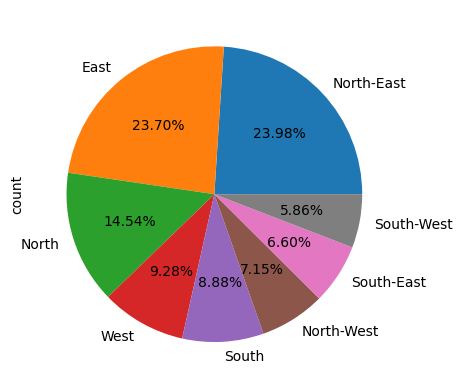

In [53]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [55]:
1011/df.shape[0]

0.2844682048396173

In [56]:
df.drop(columns=['facing'],inplace=True)

In [57]:
df.sample(5)

,Property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
283,flat,ats triumph,sector 104,1.80,7860.0,3,4,3,14.0,New Property,2544.0,0,0,0,0,0,1,60
2818,flat,godrej nature plus,sector 33,1.20,14371.0,2,2,3,1.0,New Property,86.0,0,0,0,0,0,1,65
1809,flat,sobha city,sector 108,3.25,15685.0,3,3,3,12.0,Relatively New,2072.0,0,0,0,0,0,1,99
2176,flat,rof ananda,sector 95,0.55,5500.0,3,2,2,14.0,New Property,866.0,1,0,0,0,0,0,30
2404,flat,microtek greenburg,sector 86,1.45,9797.0,3,2,3,8.0,Relatively New,1480.0,0,0,0,0,0,0,72


In [58]:
df.isnull().sum()

,0
Property_type,0
society,1
sector,0
price,0
price_per_sqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,0
agePossession,0


In [60]:
df[df['society'].isnull()]

,Property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2873,flat,NaN,sector 78,0.6,3692.0,2,2,0,2.0,Under Construction,1625.0,0,0,0,0,0,1,0


In [61]:
df.drop(index=[2873],inplace=True)

In [62]:
df.isnull().sum()

,0
Property_type,0
society,0
sector,0
price,0
price_per_sqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,0
agePossession,0


## **agePossession**


In [63]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1606
New Property,660
Moderately Old,545
Old Property,292
Undefined,291
Under Construction,159


In [64]:
df[df['agePossession'] == 'Undefined']

,Property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
10,house,independent,sector 11,1.80,8079.0,8,5,2,1.0,Undefined,2476.0,0,0,0,0,0,1,0
18,flat,hcbs sports ville,sohna road,0.29,3973.0,2,2,1,4.0,Undefined,743.0,0,0,0,0,0,1,0
25,flat,signature global park,sohna road,0.55,6691.0,2,2,3,3.0,Undefined,913.0,0,0,0,0,0,1,58
39,house,independent,sector 24,10.00,25543.0,8,10,3+,1.0,Undefined,3915.0,0,0,0,0,0,1,0
40,house,independent,sector 7,0.45,5000.0,3,2,0,1.0,Undefined,1000.0,0,0,0,0,0,1,0
41,house,independent,sector 17,3.50,24306.0,2,6,3+,3.0,Undefined,1440.0,0,0,0,0,0,1,0
45,house,independent,sector 3,0.55,7333.0,1,1,0,1.0,Undefined,750.0,0,0,0,0,0,1,0
85,flat,the roselia 2,sector 95,0.45,6475.0,2,2,2,19.0,Undefined,695.0,0,0,0,0,0,1,0
91,flat,dlf the arbour,sector 63,8.50,21519.0,4,4,0,27.0,Undefined,3950.0,0,0,0,0,0,1,61
103,house,signature global city 92,sector 92,0.75,7821.0,2,2,3,1.0,Undefined,959.0,0,0,0,0,0,1,46


In [67]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['Property_type'] == row['Property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [68]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [69]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1716
New Property,714
Moderately Old,584
Old Property,325
Under Construction,162
Undefined,52


In [70]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [71]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [72]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1725
New Property,714
Moderately Old,591
Old Property,328
Under Construction,162
Undefined,33


In [73]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['Property_type'] == row['Property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [74]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [75]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1727
New Property,714
Moderately Old,622
Old Property,328
Under Construction,162


In [76]:
df.isnull().sum()

,0
Property_type,0
society,0
sector,0
price,0
price_per_sqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,0
agePossession,0


In [77]:
df.shape

(3553, 18)

In [78]:
df.to_csv('Gurgaon_Properties_missing_values_cleaned_data.csv',index=False)